In [2]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [3]:
dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


# Make Imbalance Dataset 

In [4]:
y_imbalance = y.copy()

y_imbalance[y_imbalance != 1]=0

print("Original Dataset:", "\n", y[0:30])
print("New Dataset:", "\n", y_imbalance[0:30])

Original Dataset: 
 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New Dataset: 
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
#count of imbalance dataset (0/1)
np.bincount(y_imbalance)

array([1615,  182])

In [6]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test =  train_test_split(X, y_imbalance, random_state = 42)

svm = SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)

print("Accuracy of imbalance Dataset:{}".format(svm.score(X_test, y_test)))


Accuracy of imbalance Dataset:0.9977777777777778


In [7]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print("Accuracy of imbalance Dataset:{}".format(svm.score(X_test, y_test)))

Accuracy of imbalance Dataset:0.9777777777777777


# Dummies Classifier 

Dummies Classifier works without looking into the feature details.

strategy type: ('most_frequent', 'stratified', 'uniform', 'constant', 'prior')

In [8]:
from sklearn.dummy import DummyClassifier
dummy_majority  = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
dummy_prediction = dummy_majority.predict(X_test)

print("note: here, we can see accuracy is very good based on most likely/frequently class.Here, 0 ==> 1615, 1 ==> 182") 
print("But it doesn't express the whole scenario. Predition is showing all values are zero: 0.")
print("Accuracy of imbalance Dataset:{}".format(dummy_majority.score(X_test, y_test)))
print("predition details:", "\n", dummy_prediction)


note: here, we can see accuracy is very good based on most likely/frequently class.Here, 0 ==> 1615, 1 ==> 182
But it doesn't express the whole scenario. Predition is showing all values are zero: 0.
Accuracy of imbalance Dataset:0.9177777777777778
predition details: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [9]:
from sklearn.dummy import DummyClassifier
dummy_stratified  = DummyClassifier(strategy = "stratified").fit(X_train, y_train)
dummy_prediction_stratified = dummy_stratified.predict(X_test)
print("Accuracy of imbalance Dataset:{}".format(dummy_stratified.score(X_test, y_test)))
print("predition details:", "\n", dummy_prediction_stratified)

Accuracy of imbalance Dataset:0.8266666666666667
predition details: 
 [1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


# Confusion Matrix
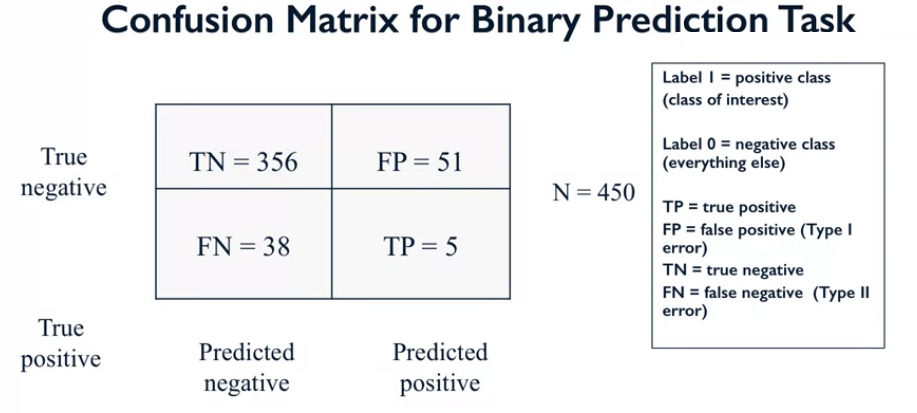

<h3>Binary 2 classes Confusion Matrix [DummyClassifier(strategy = 'most_frequent')]</h3>

predition based on frequency of class

In [10]:
dummies = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummies_pred_most_freq = dummies.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_dummies_pred_most_freq)
print("Confusion Matrix For **most_frequent** Dummy Classifier", "\n", cm)

print("here, we can see all positive classes (TP / FP) are zeros. As it alawys predicts the negative class")

Confusion Matrix For **most_frequent** Dummy Classifier 
 [[413   0]
 [ 37   0]]
here, we can see all positive classes (TP / FP) are zeros. As it alawys predicts the negative class


<h3>Binary 2 classes Confusion Matrix [DummyClassifier(strategy = 'stratified')]</h3>

Random Prediction

In [11]:
dummies = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
y_dummies_pred = dummies.predict(X_test)

cm = confusion_matrix(y_test, y_dummies_pred)
print("Confusion Matrix For **stratified** Dummy Classifier", "\n", cm)

print("here, we can see that prediction happens randomly")

Confusion Matrix For **stratified** Dummy Classifier 
 [[373  40]
 [ 34   3]]
here, we can see that prediction happens randomly


<h3>Binary 2 classes Confusion Matrix [DummyClassifier(strategy = 'uniform')]</h3>

All class has equal change to get predicted

In [12]:
dummies = DummyClassifier(strategy = 'uniform').fit(X_train, y_train)
y_dummies_pred = dummies.predict(X_test)

cm = confusion_matrix(y_test, y_dummies_pred)
print("Confusion Matrix For **Unifom** Dummy Classifier", "\n", cm)

print("here, prediction has been perform based on classes with the weighted frequency")

Confusion Matrix For **Unifom** Dummy Classifier 
 [[195 218]
 [ 22  15]]
here, prediction has been perform based on classes with the weighted frequency


<h3>Binary 2 classes Confusion Matrix [Support Vector Classifier(SVC)]</h3>

In [14]:
svm = SVC(kernel = "linear", C = 1).fit(X_train, y_train)
y_svm_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_svm_pred)
print("Confusion Matrix For SVC(kernel = linear, C = 1)", "\n", cm)


Confusion Matrix For SVC(kernel = linear, C = 1) 
 [[406   7]
 [  3  34]]


<h3>Binary 2 classes Confusion Matrix [Logistic Regression]</h3>

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)


cm = confusion_matrix(y_test, y_lr_pred)
print("Confusion Matrix For LogesticRegression(by default)", "\n", cm)

Confusion Matrix For LogesticRegression(by default) 
 [[408   5]
 [  5  32]]


<h3>Binary 2 classes Confusion Matrix [Decision Tree Classifier]</h3>

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth =2).fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

cm = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix For DecisionTreeClasifier", "\n", cm)

Confusion Matrix For DecisionTreeClasifier 
 [[398  15]
 [ 13  24]]


<h2>Evaluation Metrics For Binary Classifications</h2>



In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuarcy: {:.3f}".format(accuracy_score(y_test, y_pred_dtc)))
print("Precision Score: {:.3f}".format(precision_score(y_test, y_pred_dtc)))
print("Recall Score: {:.3f}".format(recall_score(y_test, y_pred_dtc)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_dtc)))

Accuarcy: 0.938
Precision Score: 0.615
Recall Score: 0.649
F1 Score: 0.632


<h2>Classification Report</h2>

In [18]:
from sklearn.metrics import classification_report

print("For Decision Tree Classifier: \n \n {}".format(classification_report(y_test, y_pred_dtc, target_names = ['not 1' , '1'])))
print("For Logestic Regression: \n \n {}".format(classification_report(y_test, y_lr_pred, target_names = ['not 1' , '1'])))
print("For Support Vector Classifier(SVC): \n \n {}".format(classification_report(y_test, y_svm_pred, target_names = ['not 1' , '1'])))

print("For Dummy Classifier(strategy = 'mos_frequent'): \n \n {}"
      .format(classification_report(y_test, y_dummies_pred_most_freq, target_names = ['not 1' , '1'])))

For Decision Tree Classifier: 
 
               precision    recall  f1-score   support

       not 1       0.97      0.96      0.97       413
           1       0.62      0.65      0.63        37

    accuracy                           0.94       450
   macro avg       0.79      0.81      0.80       450
weighted avg       0.94      0.94      0.94       450

For Logestic Regression: 
 
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       413
           1       0.86      0.86      0.86        37

    accuracy                           0.98       450
   macro avg       0.93      0.93      0.93       450
weighted avg       0.98      0.98      0.98       450

For Support Vector Classifier(SVC): 
 
               precision    recall  f1-score   support

       not 1       0.99      0.98      0.99       413
           1       0.83      0.92      0.87        37

    accuracy                           0.98       450
   macro avg       0.91  

# Classifier Decision Function

negative magnitude for negative class and positive magnitudee for positive class

`predict_proba`: Predicting probability of Class Membership

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

y_proba_lr = lr.predict_proba(X_test)

y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

y_proba_list

[(0, 3.539290608386586e-08),
 (0, 1.0427867074150426e-11),
 (0, 6.863697213526513e-10),
 (0, 2.675988509133787e-06),
 (0, 2.1634594646339444e-10),
 (1, 0.9991609784852562),
 (0, 2.9497548373473897e-07),
 (0, 4.4395836830676073e-07),
 (0, 2.48799817731945e-07),
 (0, 9.097900413446477e-16),
 (1, 0.32244872058888857),
 (0, 0.0003540159485406895),
 (0, 1.096097708884468e-05),
 (0, 8.041695230258648e-13),
 (0, 1.6765140371733796e-12),
 (0, 4.799243858031846e-13),
 (0, 4.255405376414263e-09),
 (0, 2.5488610064518356e-09),
 (0, 1.0372485321944972e-05),
 (0, 6.927061789370626e-09)]

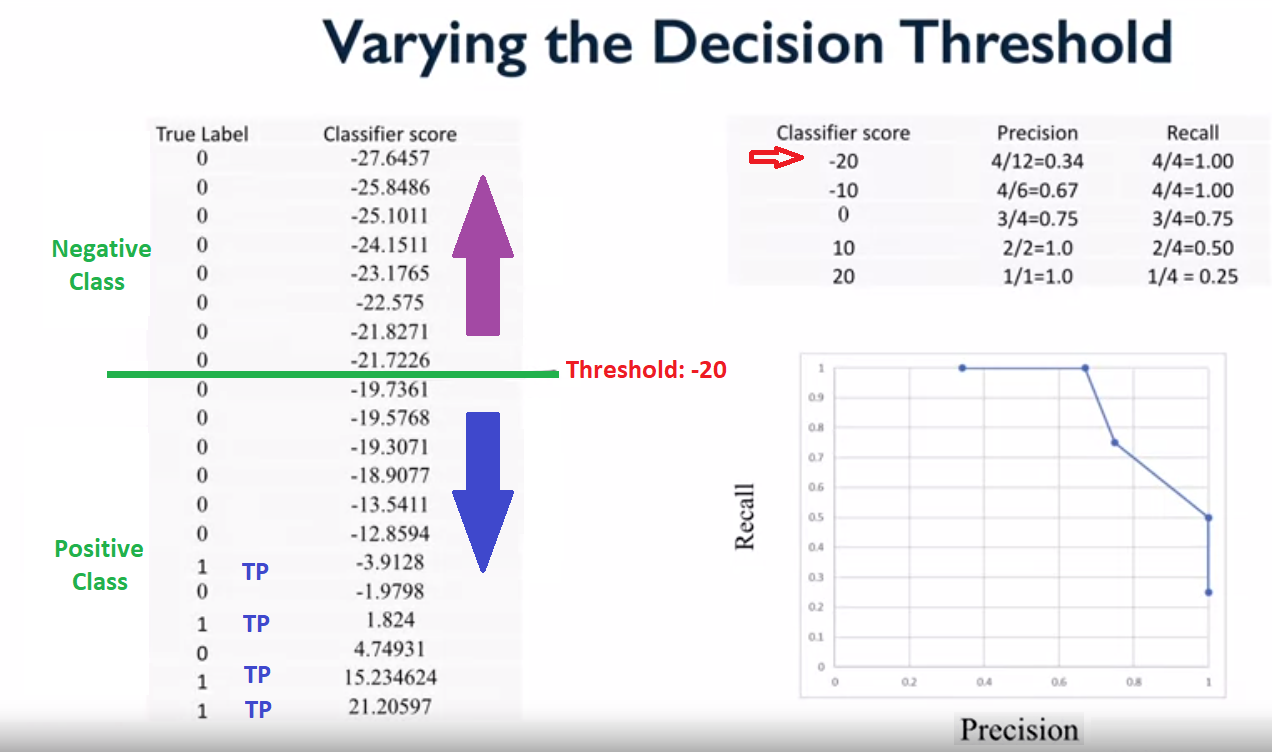

# Precision vs Recall Curve

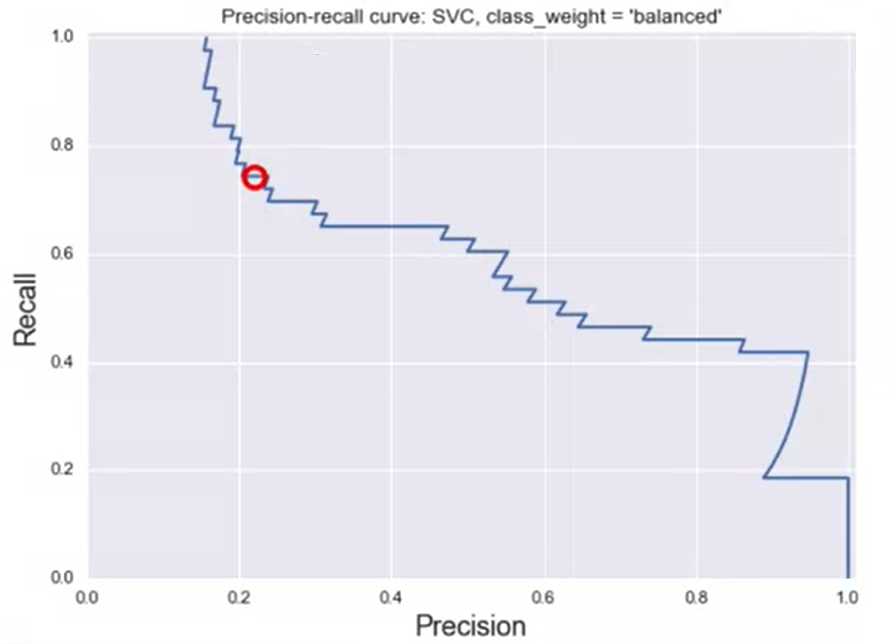


# ROC and AUC Curve

In [20]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

In [21]:
print("value of y_test: {}".format(y_test[0:10]))
print("value of y_pred: {}".format(y_lr_pred[0:10]))

value of y_test: [0 0 0 0 0 1 0 0 0 0]
value of y_pred: [0 0 0 0 0 1 0 0 0 0]


In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_lr_pred) #highest label
auc_score = auc(fpr, tpr)
auc_score

0.9263791636672993

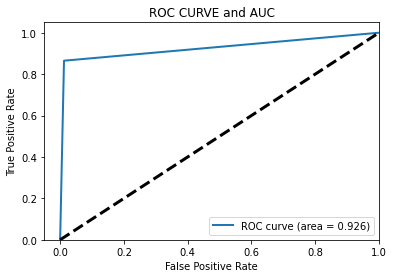

In [23]:
plt.plot(fpr, tpr,lw=2,label='ROC curve (area = {:0.3f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', lw=3)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE and AUC')
plt.legend(loc="lower right")
plt.show()

# Multiclass Evaluation

A collection of True vs Predicted Value binary outcomes for each class.

In [24]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [25]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state = 42)

Text(0.5, 15.0, 'Predicted Label')

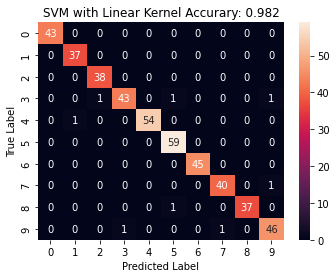

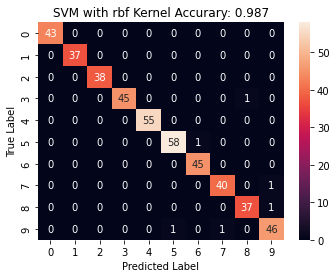

In [27]:
svm1 = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
y_pred_svm_mc = svm1.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, y_pred_svm_mc)

df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot = True)
plt.title("SVM with Linear Kernel Accurary: {:.3f}".format(accuracy_score( y_test_mc, y_pred_svm_mc)))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")



svm1 = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
y_pred_svm_mc = svm1.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, y_pred_svm_mc)

df_cm = pd.DataFrame(confusion_mc)

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot = True)
plt.title("SVM with rbf Kernel Accurary: {:.3f}".format(accuracy_score( y_test_mc, y_pred_svm_mc)))
plt.ylabel("True Label")
plt.xlabel("Predicted Label")


# Multiclass Classification Report


In [28]:
print("classification report: \n \n {}".format(classification_report(y_test_mc, y_pred_svm_mc)))
      

classification report: 
 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        59
           6       0.98      1.00      0.99        45
           7       0.98      0.98      0.98        41
           8       0.97      0.97      0.97        38
           9       0.96      0.96      0.96        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



# Macro and Micro Average

**Macro Average:** works over each classes prediction outcomes for Precision and then produces average.

**Micro Average:** works over each instance and then produces average.

metrics towards larger class, use Micro

metrics towards smaller class, use Macro

In [35]:
print("Macro-Average for Precision-Score: {:.5f}".format(precision_score(y_test_mc, y_pred_svm_mc, average = 'macro')))
print("Micro-Average for Precision-Score: {:.5f}".format(precision_score(y_test_mc, y_pred_svm_mc, average = 'micro')))

print("Macro-Average for F1-Score: {:.5f}".format(f1_score(y_test_mc, y_pred_svm_mc, average = 'macro')))
print("Micro-Average for F1-Score: {:.5f}".format(f1_score(y_test_mc, y_pred_svm_mc, average = 'micro')))

Macro-Average for Precision-Score: 0.98689
Micro-Average for Precision-Score: 0.98667
Macro-Average for F1-Score: 0.98687
Micro-Average for F1-Score: 0.98667


# Regression Evaluation

1. **r2_score:** is enoughto evaluate regressor model in most cases.

best r2_score value is **1**. If the model fits incorrectly, it shows **negative value** although its a square value.

**Alternative**
1. MAE (Mean Absolute Error) --- L1-Normalization(Lasso) [MAE: absolute difference between target and predict value]
2. MSE (Mean Square Error) --- L2-Normalization(Ridge) [MSE: square difference between target and predict value]
3. Median Absolute Error -- To avoid outlier 



<h2>Dummy Regressor</h2> 
    
**Dummy Regressor** is as like as **Dummy Classifier** which doesn't look into the input data.

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

In [60]:
diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
print("single dimension input values: \n {}".format(X[0:10]))

y = diabetes.target
print("target values: {}".format(y[0:10]))

single dimension input values: 
 [[-0.04340085]
 [ 0.07441156]
 [-0.03235593]
 [-0.03603757]
 [ 0.00814208]
 [ 0.04127682]
 [ 0.00077881]
 [ 0.02286863]
 [-0.02867429]
 [-0.02499266]]
target values: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


Linear Model Reggression Coefficient: [-657.01923867]
Mean Squared Error for Linear Model Regression: 4768.054
r2-Score for Linear Model Regression: 0.138
Mean Squared Error for Dummy Model Regression: 5607.198
r2-Score for Linear Model Regression: -0.014


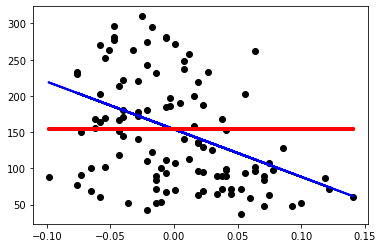

In [80]:
X_train_ln, X_test_ln, y_train_ln, y_test_ln = train_test_split(X, y, random_state = 42)

linear = LinearRegression().fit(X_train_ln, y_train_ln)
dummy_reg = DummyRegressor(strategy = "mean").fit(X_train_ln, y_train_ln)

y_pred_lin = linear.predict(X_test_ln)

y_pred_dummy = dummy_reg.predict(X_test_ln)

print("Linear Model Reggression Coefficient:", linear.coef_)
print("Mean Squared Error for Linear Model Regression: {:.3f}".format(mean_squared_error(y_test_ln, y_pred_lin)))
print("r2-Score for Linear Model Regression: {:.3f}".format(r2_score(y_test_ln, y_pred_lin)))

print("Mean Squared Error for Dummy Model Regression: {:.3f}".format(mean_squared_error(y_test_ln, y_pred_dummy)))
print("r2-Score for Linear Model Regression: {:.3f}".format(r2_score(y_test_ln, y_pred_dummy)))

plt.scatter(X_test_ln, y_test_ln, color = "black")
plt.plot(X_test_ln, y_pred_lin, color = 'blue', lw = 2, label = "Linear")
plt.plot(X_test_ln, y_pred_dummy, color = 'red', lw = 4, linestyle = "dashed", label = "dummy")
plt.show()